In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mplt
import matplotlib as plt
import datetime as dati
from math import pi
from wordcloud import WordCloud
from sklearn.metrics import log_loss

from sklearn.model_selection import train_test_split

#Modelos
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
sns.set()

In [110]:
dataset = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv', parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Actual_Delivery_Date' ])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Submitted_for_Approval                         int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  

In [111]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [112]:
dataset[dataset['Stage']== 'Closed Won']['ASP_Currency'].value_counts()

USD    3592
JPY    3112
EUR    2422
AUD     407
Name: ASP_Currency, dtype: int64

In [113]:
dataset['ASP_(converted)_Currency'].value_counts()

USD    16947
Name: ASP_(converted)_Currency, dtype: int64

<span style="font-size:larger;">Para convertir monedas</span>

In [114]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion = cotizacion.rename(columns = {'conversion': 'conversion_diaria'})
cotizacion

dataset= dataset.merge(cotizacion, on = ['ASP_Currency', 'Opportunity_Created_Date'], how = 'left')

dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016 - 3,Q1,2016,NaT,0,EUR,103350.00,EUR,2

In [115]:
dataset['conversion_diaria'].isna().value_counts()

False    16876
True        71
Name: conversion_diaria, dtype: int64

In [116]:
#dataset[dataset['conversion_diaria'].isna()].head()
dataset['conversion'] = dataset.loc[:,'conversion'].fillna(dataset['conversion_diaria'])

In [117]:
#dropeo un registro que genera ruido
dataset = dataset.drop(dataset[dataset['conversion'] == np.inf].index)

In [118]:
(dataset['conversion']== np.inf).value_counts()

False    16946
Name: conversion, dtype: int64

In [119]:
#elimino el valor infinito


In [120]:
#a los pocos registros que quedan, los llenamos con el promedio
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].std())

0.008988898978753627
1.1151393614133822e-05


In [121]:
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
print(dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].std())

1.131064624673212
0.001954246969859013


In [122]:
dataset['Prod_Category_A'].value_counts()

Prod_Category_A_None    16946
Name: Prod_Category_A, dtype: int64

In [123]:
dataset.loc[dataset['ASP_Currency'] == 'USD', 'conversion'] = 1


In [124]:
print(dataset['conversion'].isna().sum())

64


In [125]:
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].notna().sum())
print(dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].isna().sum())

4460
61


In [126]:
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
dataset['conversion'].value_counts()

1.000000    7362
0.008990     323
0.008990     299
1.131091     273
1.131083     235
            ... 
1.131107       1
0.008990       1
1.131103       1
0.008902       1
0.008956       1
Name: conversion, Length: 375, dtype: int64

In [127]:
dataset['Total_Amount_USD'] = dataset['Total_Amount'] * dataset['conversion']
dataset['Total_Taxable_Amount_USD'] = dataset['Total_Taxable_Amount'] * dataset['conversion']

In [128]:
dataset.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.52,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5964043.80,5964043.80
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.53,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,54552.68,54552.68
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.48,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,83865.60,83865.60
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7421881.50,7421881.50
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.53,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,13357192.50,13357192.50


In [129]:
#Wins con total de dinero 
wins = dataset.loc[dataset['Stage'] == 'Closed Won']
wins = wins.groupby(['Region']).agg({'Total_Amount_USD':['sum']}).reset_index()

# level0 = wins.columns.get_level_values(0)
# level1 = wins.columns.get_level_values(1)
# wins.columns = level0 + ' ' + level1
wins.columns = ['Region','TotalGananciasEnUSD']
wins

,Region,TotalGananciasEnUSD
0,APAC,2.014008e+08
1,Americas,7.580518e+08
2,EMEA,5.799539e+08
3,Japan,1.177900e+08
4,Middle East,4.750702e+06


In [130]:
lost = dataset.loc[dataset['Stage'] == 'Closed Lost']
lost = lost.groupby(['Region']).agg({'Total_Amount_USD':['sum']}).reset_index()

# level0 = wins.columns.get_level_values(0)
# level1 = wins.columns.get_level_values(1)
# wins.columns = level0 + ' ' + level1
lost.columns = ['Region','TotalPerdidasEnUSD']
lost

,Region,TotalPerdidasEnUSD
0,APAC,3.754151e+09
1,Americas,6.697853e+09
2,EMEA,4.168169e+09
3,Japan,2.416296e+08
4,Middle East,2.899886e+08


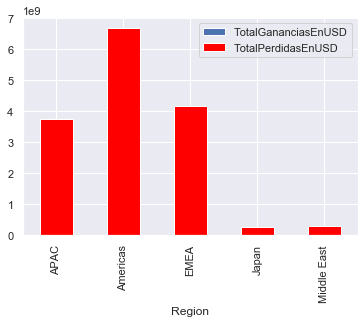

In [131]:
#Closed won
ax = mplt.gca()
wins.plot(kind='bar',x='Region',y='TotalGananciasEnUSD',ax=ax)
lost.plot(kind='bar',x='Region',y='TotalPerdidasEnUSD', color='red', ax=ax)

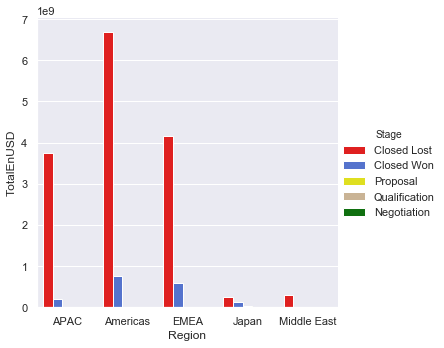

In [132]:
df = dataset.groupby(['Region','Stage']).agg({'Total_Amount_USD':['sum']}).reset_index()
df.columns = ['Region','Stage','TotalEnUSD']

stage_palette ={"Closed Won": "royalblue", "Closed Lost": "red", "Negotiation":"green", "Qualification" :"tan", "Proposal": "Yellow"}

sns.catplot(x="Region", y="TotalEnUSD", hue="Stage", kind="bar", data=df,palette = stage_palette)

In [133]:
pd.set_option('max_columns', None)
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5.964044e+06,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,5.455268e+04,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,8.386560e+04,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7.421882e+06,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,1.335719e+07,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,

In [134]:
df = dataset.loc[dataset['Stage'] == 'Closed Won'].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
df.columns= ['Closed won count']
df = df.reset_index()

dfLost = dataset.loc[dataset['Stage'] == 'Closed Lost'].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
dfLost.columns= ['Closed lost count']
dfLost = dfLost.reset_index()

df

,Billing_Country,Stage,Closed won count
0,Australia,Closed Won,695
1,Austria,Closed Won,122
2,Bahrain,Closed Won,1
3,Belgium,Closed Won,119
4,Bulgaria,Closed Won,1
5,Cambodia,Closed Won,3
6,Canada,Closed Won,32
7,China,Closed Won,203
8,Cyprus,Closed Won,34
9,Czech Republic,Closed Won,3


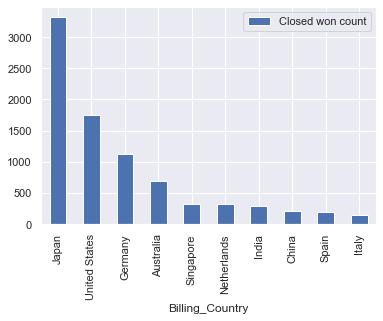

In [135]:
ax = mplt.gca()
df.nlargest(10,'Closed won count').plot(kind='bar',x='Billing_Country',y='Closed won count',ax=ax)
#dfLost.nlargest(10,'Closed lost count').plot(kind='bar',x='Billing_Country',y='Closed lost count', color='red', ax=ax)

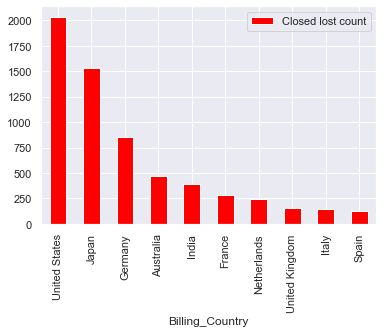

In [136]:
ax = mplt.gca()
dfLost.nlargest(10,'Closed lost count').plot(kind='bar',x='Billing_Country',y='Closed lost count', color='red', ax=ax)

In [137]:
dataset.groupby(['Billing_Country']).agg({'Stage': 'count'}).nlargest(10,'Stage')

,Stage
Billing_Country,
Japan,4878
United States,3802
Germany,1979
Australia,1169
India,672
Netherlands,563
Singapore,432
France,396
Spain,317


In [138]:
lista_top_paises = dataset['Billing_Country'].value_counts().head(20).index.tolist()
countDataset = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country','Stage']).agg({'Stage': 'count'})
countDataset= countDataset.unstack().reset_index()
countDataset.columns=['Billing_Country','Closed Lost', 'Closed Won','Negociation','Proposal','Qualification']
countDataset = countDataset.fillna(0)
countDataset['Total_Operations'] = countDataset['Closed Lost']+ countDataset['Closed Won']+countDataset['Negociation']+countDataset['Proposal']+countDataset['Qualification']
countDataset


,Billing_Country,Closed Lost,Closed Won,Negociation,Proposal,Qualification,Total_Operations
0,Australia,470.0,695.0,0.0,4.0,0.0,1169.0
1,Austria,23.0,122.0,0.0,0.0,0.0,145.0
2,Belgium,107.0,119.0,0.0,0.0,0.0,226.0
3,Canada,88.0,32.0,0.0,0.0,0.0,120.0
4,China,19.0,203.0,0.0,0.0,0.0,222.0
5,France,285.0,111.0,0.0,0.0,0.0,396.0
6,Germany,855.0,1122.0,1.0,1.0,0.0,1979.0
7,India,387.0,284.0,0.0,0.0,1.0,672.0
8,Indonesia,86.0,53.0,0.0,3.0,0.0,142.0
9,Italy,143.0,152.0,0.0,0.0,0.0,295.0


In [139]:
paisesConMasOperaciones = countDataset.nlargest(10,'Total_Operations')
paisesConMasOperaciones = paisesConMasOperaciones.set_index('Billing_Country')
paisesConMasOperaciones

,Closed Lost,Closed Won,Negociation,Proposal,Qualification,Total_Operations
Billing_Country,,,,,,
Japan,1532.0,3323.0,1.0,14.0,8.0,4878.0
United States,2035.0,1755.0,8.0,4.0,0.0,3802.0
Germany,855.0,1122.0,1.0,1.0,0.0,1979.0
Australia,470.0,695.0,0.0,4.0,0.0,1169.0
India,387.0,284.0,0.0,0.0,1.0,672.0
Netherlands,248.0,315.0,0.0,0.0,0.0,563.0
Singapore,114.0,318.0,0.0,0.0,0.0,432.0
France,285.0,111.0,0.0,0.0,0.0,396.0
Spain,125.0,192.0,0.0,0.0,0.0,317.0


Text(0.5, 1.1, 'Cantidad de operaciones de los top paises ')

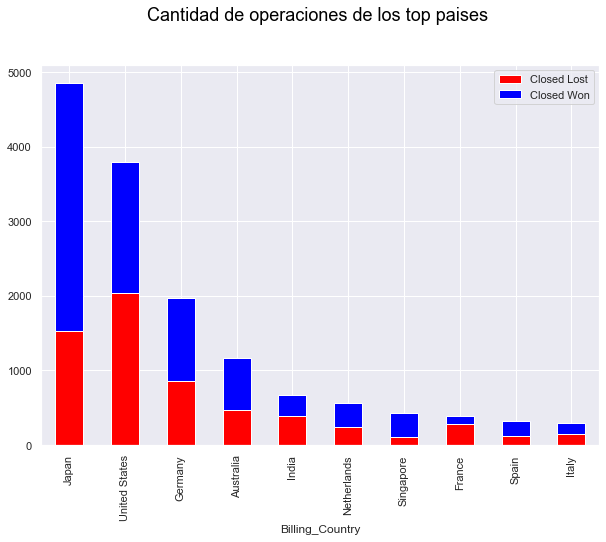

In [140]:
stage_palette ={"Closed Won": "royalblue", "Closed Lost": "red"}
paisesConMasOperaciones.drop(['Qualification',"Total_Operations","Proposal","Negociation"],axis = 1).plot.bar(stacked=True, figsize=(10,7),color=['red','blue'])
mplt.title("Cantidad de operaciones de los top paises ", size=18, color = 'black', y=1.1)

In [141]:
taxableDataset =  dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country']).agg({'Total_Taxable_Amount_USD': 'sum'})
taxableDataset = taxableDataset.reset_index()
taxableDataset['Total_Ammount_USD'] = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country']).agg({'Total_Amount_USD': 'sum'}).reset_index()['Total_Amount_USD']
taxableDataset['Taxable_Difference'] = taxableDataset['Total_Taxable_Amount_USD'] - taxableDataset['Total_Ammount_USD']
taxableDataset

,Billing_Country,Total_Taxable_Amount_USD,Total_Ammount_USD,Taxable_Difference
0,Australia,4.527611e+09,1.971366e+09,2.556245e+09
1,Austria,5.937795e+07,2.815869e+07,3.121926e+07
2,Belgium,4.500144e+08,4.241429e+08,2.587147e+07
3,Canada,7.571284e+08,1.807793e+08,5.763491e+08
4,China,4.080310e+07,3.516451e+07,5.638590e+06
5,France,5.110609e+08,4.549467e+08,5.611421e+07
6,Germany,4.034896e+09,2.077067e+09,1.957829e+09
7,India,1.104003e+09,6.575188e+08,4.464840e+08
8,Indonesia,3.054278e+07,1.263209e+08,-9.577808e+07
9,Italy,3.149945e+08,1.758005e+08,1.391940e+08


In [142]:
trf = dataset.loc[dataset['Billing_Country'].isin(lista_top_paises)].groupby(['Billing_Country','Stage',]).agg({'TRF': ['mean','count']}).reset_index()
trf

Billing_Country          Stage        TRF      
                                        mean count
0        Australia    Closed Lost  11.795745   470
1        Australia     Closed Won   0.041727   695
2        Australia       Proposal   1.000000     4
3          Austria    Closed Lost   1.782609    23
4          Austria     Closed Won   0.016393   122
5          Belgium    Closed Lost   3.560748   107
6          Belgium     Closed Won   0.109244   119
7           Canada    Closed Lost   3.840909    88
8           Canada     Closed Won   0.281250    32
9            China    Closed Lost   4.368421    19
10           China     Closed Won   0.014778   203
11          France    Closed Lost   3.308772   285
12          France     Closed Won   0.279279   111
13         Germany    Closed Lost   5.254971   855
14         Germany     Closed Won   0.647059  1122
15         Germany    Negotiation   9.000000     1
16         Germany       Proposal  20.000000     1
17           India    Closed Lost   3.984496   387
18           India     Closed Won   0.644366   284
19           India  Qualification   1.000000     1
20       Indonesia    Closed Lost   2.709302    86
21       Indonesia     Closed Won   0.113208    53
22       Indonesia       Proposal   0.666667     3
23           Italy    Closed Lost   2.783217   143
24           Italy     Closed Won   0.032895   152
25           Japan    Closed Lost   0.449086  1532
26           Japan     Closed Won   0.050858  3323
27           Japan    Negotiation   0.000000     1
28           Japan       Proposal   5.714286    14
29           Japan  Qualification   2.625000     8
30          Jordan    Closed Lost   1.046154    65
31          Jordan     Closed Won   0.102564    39
32          Jordan    Negotiation   0.500000     2
33      Luxembourg    Closed Lost   0.787234    47
34      Luxembourg     Closed Won   0.011236    89
35     Netherlands    Closed Lost   1.995968   248
36     Netherlands     Closed Won   0.266667   315
37     Philippines    Closed Lost   4.036364    55
38     Philippines     Closed Won   0.012048    83
39       Singapore    Closed Lost   5.447368   114
40       Singapore     Closed Won   0.103774   318
41           Spain    Closed Lost   9.528000   125
42           Spain     Closed Won   0.031250   192
43        Thailand    Closed Lost   7.543689   103
44        Thailand     Closed Won   0.422222    90
45        Thailand  Qualification   5.000000     2
46  United Kingdom    Closed Lost   2.929936   157
47  United Kingdom     Closed Won   0.779528   127
48   United States    Closed Lost   7.077641  2035
49   United States     Closed Won   0.822792  1755
50   United States    Negotiation   0.000000     8
51   United States       Proposal   1.500000     4

In [143]:
radartrf = dataset.groupby(['Stage']).agg({'TRF': ['mean','max','std','min']}).reset_index()
radartrf

Stage       TRF                    
                      mean  max        std min
0    Closed Lost  4.954552  500  18.054938   0
1     Closed Won  0.317109   42   1.540895   0
2    Negotiation  0.722222    9   2.136670   0
3       Proposal  4.114286   33   7.271101   0
4  Qualification  2.909091   20   5.990902   0

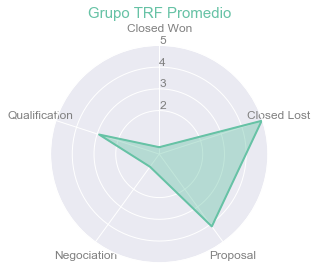

<Figure size 1000x1000 with 0 Axes>

In [144]:
df = pd.DataFrame({
'group': ['TRF Promedio'],
'Closed Won': [0.317109],
'Closed Lost': [4.954552],
'Proposal':[4.114286],
'Negociation':[0.722222],
'Qualification':[2.909091]
})
 
# ------- PART 1: Define a function that do a plot for one line of the dataset!
 
def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([2,3,4,5], ["2","3","4","5"], color="grey", size=12)
    mplt.ylim(0,5)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


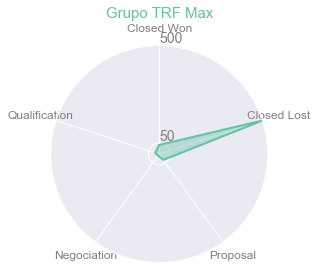

<Figure size 1000x1000 with 0 Axes>

In [145]:
df = pd.DataFrame({
'group': ['TRF Max'],
'Closed Won': [42],
'Closed Lost': [500],
'Proposal':[33],
'Negociation':[9],
'Qualification':[20]
})


def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([50,500], ["50","500"], color="grey", size=14)
    mplt.ylim(0,500)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


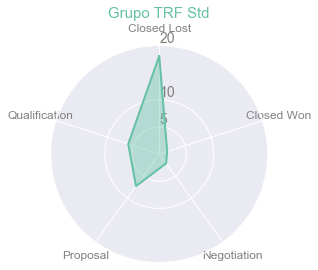

<Figure size 1000x1000 with 0 Axes>

In [146]:
df = pd.DataFrame({
'group': ['TRF Std'],
"Closed Lost"	:[18.054938],
"Closed Won"	:[1.540895],
"Negotiation"	:[2.136670],
"Proposal"	:[7.271101],
"Qualification"	:[5.990902],
})


def make_spider( row, title, color):
 
    # number of variable
    categories = list(df)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = mplt.subplot(1,1,row+1, polar=True, )
 
    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
    # Draw one axe per variable + add labels labels yet
    mplt.xticks(angles[:-1], categories, color='grey', size=12)
 
    # Draw ylabels
    ax.set_rlabel_position(0)
    mplt.yticks([5,10,20], ["5","10","20"], color="grey", size=14)
    mplt.ylim(0,20)
 
    # Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
 
    # Add a title
    mplt.title(title, size=15, color=color, y=1.1)
 
    # ------- PART 2: Apply to all individuals
    # initialize the figure
    my_dpi=96
    mplt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
    # Create a color palette:
my_palette = mplt.cm.get_cmap("Set2", len(df.index))
 
    # Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='Grupo '+df['group'][row], color=my_palette(row))


In [147]:
trfProds = dataset.groupby(['Bureaucratic_Code','Stage']).agg({'TRF': ['mean','count']}).reset_index()
trfProds

Bureaucratic_Code          Stage        TRF      
                                             mean count
0   Bureaucratic_Code_0     Closed Won   4.725490    51
1   Bureaucratic_Code_1    Closed Lost   2.861635   159
2   Bureaucratic_Code_1     Closed Won   0.205882   102
3   Bureaucratic_Code_2    Closed Lost  11.500000   128
4   Bureaucratic_Code_2     Closed Won   0.859649   114
5   Bureaucratic_Code_3    Closed Lost  20.000000     1
6   Bureaucratic_Code_3     Closed Won   1.000000     1
7   Bureaucratic_Code_4    Closed Lost   3.742251  4291
8   Bureaucratic_Code_4     Closed Won   0.210590  8253
9   Bureaucratic_Code_4    Negotiation   0.764706    17
10  Bureaucratic_Code_4       Proposal   4.615385    26
11  Bureaucratic_Code_5    Closed Lost   6.644765  2770
12  Bureaucratic_Code_5     Closed Won   0.874382  1011
13  Bureaucratic_Code_5    Negotiation   0.000000     1
14  Bureaucratic_Code_5       Proposal   2.666667     9
15  Bureaucratic_Code_5  Qualification   2.909091    11
16  Bureaucratic_Code_6     Closed Won  40.000000     1

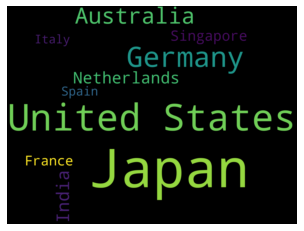

In [148]:
freqPaises = dataset['Billing_Country'].value_counts()

wordcloud = WordCloud(width=2000,height=1500, max_words= 10 ,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freqPaises)
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis("off")
mplt.show()

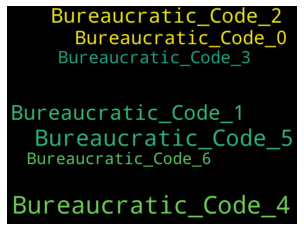

In [149]:
freqCode = dataset['Bureaucratic_Code'].value_counts()

wordcloud = WordCloud(width=2000,height=1500, max_words= 10 ,relative_scaling=0.1,normalize_plurals=False).generate_from_frequencies(freqCode)
mplt.imshow(wordcloud, interpolation='bilinear')
mplt.axis("off")
mplt.show()

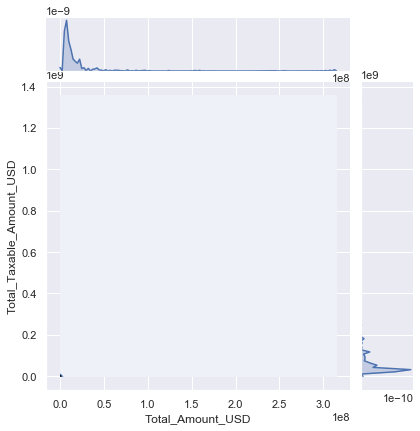

In [150]:
sns.jointplot(x=dataset["Total_Amount_USD"], y=dataset["Total_Taxable_Amount_USD"], kind='kde')

In [151]:
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,Prod_Category_A_None,1.131096,1.131095,5.964044e+06,5.964044e+06
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,Closed Won,Prod_Category_A_None,1.131094,1.131095,5.455268e+04,5.455268e+04
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,Closed Won,Prod_Category_A_None,1.000000,1.000000,8.386560e+04,8.386560e+04
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,7.421882e+06,7.421882e+06
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,Closed Lost,Prod_Category_A_None,1.000000,1.000000,1.335719e+07,1.335719e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,

In [152]:
asd = dataset.groupby(['Account_Name','Stage']).agg({'TRF': ['mean','count']}).reset_index()
asd.columns = ['Account_Name','Stage','TRF mean','TRF count']
asd

# sns.jointplot(x=asd["Account_Name"], y=asd["TRF mean"], kind='kde')

,Account_Name,Stage,TRF mean,TRF count
0,Account_Name_0,Closed Won,0.0,1
1,Account_Name_1,Closed Lost,50.0,1
2,Account_Name_10,Closed Lost,0.0,1
3,Account_Name_100,Closed Won,0.0,1
4,Account_Name_100,Proposal,0.0,1
...,...,...,...,...
2100,Account_Name_994,Closed Won,0.0,4
2101,Account_Name_996,Closed Lost,12.0,1
2102,Account_Name_997,Closed Lost,0.0,1
2103,Account_Name_998,Closed Won,0.0,1


In [153]:
# sns.histplot(asd, x="TRF mean", y="Account_Name", hue="Account_Name", legend=False)

In [154]:
# f, ax = mplt.subplots(figsize=(14, 7))
# palette ={"Closed Won": "royalblue", "Closed Lost": "red", "Proposal": "Yellow"}

# plot = sns.histplot(ax= ax,data=grouped_continous,bins= values,multiple="dodge", x="count", hue="Stage",kde = False,palette=palette)
# mplt.xticks(values)
# mplt.title('Frecuencia de rachas de oportunidades ganadas y perdidas',fontsize=30)
# plot
# #sns.countplot(ax= ax,data= grouped_continous, x="count", hue="Stage",palette=palette)
# ax.set_xlabel("Tamaño de racha",fontsize=15)
# ax.set_ylabel("Frecuencia de aparicion",fontsize=15)
# ax.set_yscale('log')
# f.savefig("racha_general.png")

In [155]:
dataset["Stage"] = dataset['Stage'].replace("Closed Won",1)
dataset["Stage"] = dataset['Stage'].replace("Closed Lost",0)
dataset = dataset.drop(dataset[dataset.Stage == "Proposal"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Negotiation"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Qualification"].index)
# dataset["Stage"].value_counts()

dataset['Source']= dataset['Source ']
dataset = dataset.drop(columns=['Source '])
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Brand,Product_Type,Size,Product_Category_B,Price,Currency,Last_Activity,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,conversion,conversion_diaria,Total_Amount_USD,Total_Taxable_Amount_USD,Source
0,27761,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-30,6/13/2016,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,NaT,10,EUR,5272800.00,EUR,5272800.0,0,Prod_Category_A_None,1.131096,1.131095,5.964044e+06,5.964044e+06,None
1,27760,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,2015-06-16,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,None,None,None,None,None,None,NaT,2016-01-20,1/15/2016,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,NaT,0,EUR,48230.00,EUR,48230.0,1,Prod_Category_A_None,1.131094,1.131095,5.455268e+04,5.455268e+04,None
2,27446,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,2015-04-21,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,None,None,None,None,None,None,NaT,2016-09-30,9/29/2016,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,NaT,0,USD,83865.60,USD,83865.6,1,Prod_Category_A_None,1.000000,1.000000,8.386560e+04,8.386560e+04,Source_7
3,16808,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,NaT,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,NaT,14,USD,7421881.50,USD,7421881.5,0,Prod_Category_A_None,1.000000,1.000000,7.421882e+06,7.421882e+06,Source_11
4,16805,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,2013-07-27,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,Other,Product_Type_0,Size_4,Product_Category_B_16,0.42,USD,NaT,2017-06-02,3/27/2018,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,NaT,25,USD,13357192.50,USD,13357192.5,0,Prod_Category_A_None,1.000000,1.000000,1.335719e+07,1.335719e+07,Source_11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16942,8781,EMEA,Austria,1,1,1,1,0,Bureaucratic_Code_4,2016-01-15,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,None,None,None,None,None,None,NaT,NaT,1/19/2016,Person_Name_13

In [156]:
#Split
df_train =  dataset.drop(columns=["Source","ID","Region","Territory","Bureaucratic_Code","Account_Created_Date","Billing_Country","Account_Name","Opportunity_Name","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type","Delivery_Terms","Opportunity_Created_Date","Brand","Product_Type","Size","Product_Category_B","Price","Currency","Last_Activity","Quote_Expiry_Date","Last_Modified_Date","Last_Modified_By","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Actual_Delivery_Date","Total_Amount_Currency","Total_Amount","Total_Taxable_Amount_Currency","Total_Taxable_Amount","Prod_Category_A","conversion","conversion_diaria"	,"Total_Amount_USD"	,"Total_Taxable_Amount_USD"])

#Features de poca importancia para probar
df_train = df_train.drop(columns=["Bureaucratic_Code_0_Approved","Submitted_for_Approval"])

Y = np.array(df_train['Stage']).astype(int) # prediction 
df_train = df_train.drop(columns=['Stage'])

X = df_train.astype(int) #Train local


x_train, x_test, y_train, y_test = train_test_split(X,Y)

In [160]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)
print(xg_reg.score(x_test,y_test))
print(xg_reg.score(x_train,y_train))
print(log_loss(y_test, Y_pred))

0.7510068704098555
0.7542058289234658
8.60002884519019


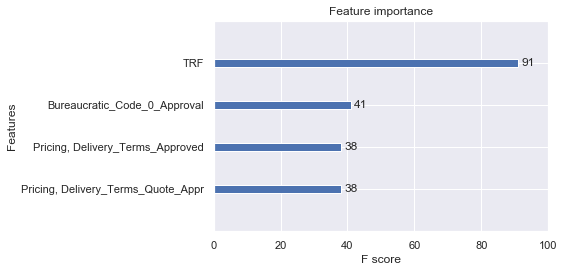

In [158]:
plot = xgb.plot_importance(xg_reg)
mplt.gcf().subplots_adjust(bottom=0.15)
fig = plot.get_figure()
fig.savefig("XgboostFI.png")

In [51]:
catb = CatBoostClassifier()
catb.fit(x_train, y_train)
preds = catb.predict(x_test)
print(catb.score(x_test,y_test))
print(catb.score(x_train,y_train))

Learning rate set to 0.030457
0:	learn: 0.6817790	total: 333ms	remaining: 5m 33s
1:	learn: 0.6708951	total: 363ms	remaining: 3m 1s
2:	learn: 0.6608614	total: 387ms	remaining: 2m 8s
3:	learn: 0.6523672	total: 435ms	remaining: 1m 48s
4:	learn: 0.6433537	total: 476ms	remaining: 1m 34s
5:	learn: 0.6352933	total: 501ms	remaining: 1m 22s
6:	learn: 0.6274784	total: 543ms	remaining: 1m 16s
7:	learn: 0.6215387	total: 572ms	remaining: 1m 10s
8:	learn: 0.6163353	total: 590ms	remaining: 1m 4s
9:	learn: 0.6099612	total: 677ms	remaining: 1m 7s
10:	learn: 0.6046730	total: 704ms	remaining: 1m 3s
11:	learn: 0.6004483	total: 730ms	remaining: 1m
12:	learn: 0.5952896	total: 749ms	remaining: 56.9s
13:	learn: 0.5902805	total: 772ms	remaining: 54.4s
14:	learn: 0.5857248	total: 789ms	remaining: 51.8s
15:	learn: 0.5819606	total: 812ms	remaining: 49.9s
16:	learn: 0.5784201	total: 827ms	remaining: 47.8s
17:	learn: 0.5745027	total: 850ms	remaining: 46.4s
18:	learn: 0.5710488	total: 872ms	remaining: 45s
19:	learn:

In [52]:
catb.get_feature_importance(data=None, prettified=False, thread_count=-1, verbose=False)

array([12.01353303, 35.93665994, 11.33422115, 40.71558588])

In [108]:
#Rf Clasifier
classifier = RandomForestClassifier(n_estimators = 100 ,max_depth=2, random_state=0)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
print(classifier.score(x_test,y_test))
print(classifier.score(x_train,y_train))
print(log_loss)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

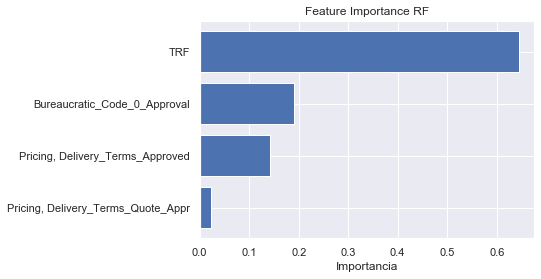

In [54]:
features = x_train.columns
importances = classifier.feature_importances_
indices = np.argsort(importances)

mplt.title('Feature Importance RF')
mplt.barh(range(len(indices)), importances[indices], color='b')
mplt.yticks(range(len(indices)), [features[i] for i in indices])
mplt.xlabel('Importancia')
# plt.show()
mplt.savefig('RandomForestFI.png')

In [55]:
#Cosas de lucas ,la puta madre tira error

In [56]:
dataset = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv', parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
dataset = dataset.drop(columns= ['Prod_Category_A','Product_Category_B','Actual_Delivery_Date','Submitted_for_Approval','Last_Activity','Price','Currency','Brand','Size','Product_Type'])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  object
Opportunity_Type                              

In [57]:
#limpio los datos no finalzizados
dataset = dataset.loc[(dataset['Stage']== 'Closed Won') | (dataset['Stage']== 'Closed Lost')]
dataset['Stage'].value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

# Convertir mondeas

In [58]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion = cotizacion.rename(columns = {'conversion': 'conversion_diaria'})
cotizacion

dataset= dataset.merge(cotizacion, on = ['ASP_Currency', 'Opportunity_Created_Date'], how = 'left')

dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,conversion,conversion_diaria
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,1.131096,1.131095
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,1.131094,1.131095
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,1.000000,1.000000
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,1.000000,1.000000
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,1.131096,1.131093
16879,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016 - 4,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,1.131096,1.131093
16880,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_92

In [59]:
dataset['conversion'] = dataset.loc[:,'conversion'].fillna(dataset['conversion_diaria'])

In [60]:
dataset = dataset.drop(dataset[dataset['conversion'] == np.inf].index)

In [61]:
dataset.loc[dataset['ASP_Currency'] == 'USD', 'conversion'] = 1
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
dataset['Total_Amount_converted'] = dataset['Total_Amount'] * dataset['conversion']

In [62]:
dataset['delta_planed'] = dataset['Planned_Delivery_End_Date'] - dataset['Planned_Delivery_Start_Date']

In [63]:
dataset.dtypes

ID                                              int64
Region                                         object
Territory                                      object
Pricing, Delivery_Terms_Quote_Appr              int64
Pricing, Delivery_Terms_Approved                int64
Bureaucratic_Code_0_Approval                    int64
Bureaucratic_Code_0_Approved                    int64
Bureaucratic_Code                              object
Account_Created_Date                   datetime64[ns]
Source                                         object
Billing_Country                                object
Account_Name                                   object
Opportunity_Name                               object
Opportunity_ID                                  int64
Sales_Contract_No                              object
Account_Owner                                  object
Opportunity_Owner                              object
Account_Type                                   object
Opportunity_Type            

In [64]:
dataset['acount_age'] = dataset['Opportunity_Created_Date'] - dataset['Account_Created_Date']

# features por oportunity ID

In [65]:
#Opportunity_ID
features= ['sum','mean','median','std', 'max', 'min']

dataset_numerico = dataset[['Opportunity_ID','ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 'Total_Taxable_Amount', 'Total_Amount_converted']]
#ASP                                           float64
#ASP_(converted)                               float64
#TRF                                             int64
#Total_Amount                                  float64
#Total_Taxable_Amount                          float64
#Total_Amount_converted                        float64

features_num= dataset_numerico.groupby('Opportunity_ID').agg(features)
level_0 = features_num.columns.get_level_values(0)
level_1 = features_num.columns.get_level_values(1)
features_num.columns = level_0 + '_' + level_1
features_num.reset_index()
dataset = dataset.join(features_num, on= 'Opportunity_ID', how = 'left')

In [66]:
dataset.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
                                       ...   
Total_Amount_converted_mean           float64
Total_Amount_converted_median         float64
Total_Amount_converted_std            float64
Total_Amount_converted_max            float64
Total_Amount_converted_min            float64
Length: 83, dtype: object

# Gererador de features cumulative para categoricas

In [67]:
dataset['ganado']= (dataset['Stage']== 'Closed Won' )
dataset['counter']= 1
categorical = ['Region', 'Territory', 'Product_Name', 'Account_Owner','Bureaucratic_Code','Billing_Country', 'Account_Name', 'Opportunity_Owner','Quote_Type', 'Delivery_Terms','Last_Modified_By', 'Product_Family', 'Month', 'Delivery_Quarter']
for agrupador in categorical:
    gruped_product = dataset.groupby(agrupador)[['ganado','counter']].cumsum()
    gruped_product[agrupador + '_mean'] = gruped_product['ganado']/ gruped_product['counter']
    gruped_product= gruped_product.rename(columns = {'ganado':(agrupador + '_ganados'), 'counter': (agrupador + '_count') })
    dataset= dataset.join(gruped_product)

    

In [68]:
dataset.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
                                       ...   
Month_count                             int64
Month_mean                            float64
Delivery_Quarter_ganados              float64
Delivery_Quarter_count                  int64
Delivery_Quarter_mean                 float64
Length: 127, dtype: object

# categorical de a pares

In [69]:
for i in range(len(categorical) -1):
    for j in range(i +1, len(categorical)):
        gruped_product = dataset.groupby([categorical[i],categorical[j]])[['ganado','counter']].cumsum()
        gruped_product[categorical[i] + '_'+ categorical[j] + '_mean'] = gruped_product['ganado']/ gruped_product['counter']
        gruped_product= gruped_product.rename(columns = {'ganado':(categorical[i] + '_'+ categorical[j] + '_ganados'), 'counter': (categorical[i] + '_'+ categorical[j] + '_count') })
        dataset= dataset.join(gruped_product)
        

In [70]:
dataset.dtypes

ID                                         int64
Region                                    object
Territory                                 object
Pricing, Delivery_Terms_Quote_Appr         int64
Pricing, Delivery_Terms_Approved           int64
                                          ...   
Product_Family_Delivery_Quarter_count      int64
Product_Family_Delivery_Quarter_mean     float64
Month_Delivery_Quarter_ganados           float64
Month_Delivery_Quarter_count               int64
Month_Delivery_Quarter_mean              float64
Length: 400, dtype: object

In [71]:
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,conversion,conversion_diaria,Total_Amount_converted,delta_planed,acount_age,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,ASP_(converted)_max,ASP_(converted)_min,TRF_sum,TRF_mean,TRF_median,TRF_std,TRF_max,TRF_min,Total_Amount_sum,Total_Amount_mean,Total_Amount_median,Total_Amount_std,Total_Amount_max,Total_Amount_min,Total_Taxable_Amount_sum,Total_Taxable_Amount_mean,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min,ganado,counter,Region_ganados,Region_count,Region_mean,Territory_ganados,Territory_count,Territory_mean,Product_Name_ganados,Product_Name_count,Product_Name_mean,Account_Owner_ganados,Account_Owner_count,Account_Owner_mean,Bureaucratic_Code_ganados,Bureaucratic_Code_count,Bureaucratic_Code_mean,Billing_Country_ganados,Billing_Country_count,Billing_Country_mean,Account_Name_ganados,Account_Name_count,Account_Name_mean,Opportunity_Owner_ganados,Opportunity_Owner_count,Opportunity_Owner_mean,Quote_Type_ganados,Quote_Type_count,Quote_Type_mean,Delivery_Terms_ganados,Delivery_Terms_count,Delivery_Terms_mean,Last_Modified_By_ganados,Last_Modified_By_count,Last_Modified_By_mean,Product_Family_ganados,Product_Family_count,Product_Family_mean,Month_ganados,Month_count,Month_mean,Delivery_Quarter_ganados,Delivery_Quarter_count,Delivery_Quarter_mean,Region_Territory_ganados,Region_Territory_count,Region_Territory_mean,Region_Product_Name_ganados,Region_Product_Name_count,Region_Product_Name_mean,Region_Account_Owner_ganados,Region_Account_Owner_count,Region_Account_Owner_mean,Region_Bureaucratic_Code_ganados,Region_Bureaucratic_Code_count,Region_Bureaucratic_Code_mean,Region_Billing_Country_ganados,Region_Billing_Country_count,Region_Billing_Country_mean,Region_Account_Name_ganados,Region_Account_Name_count,Region_Account_Name_mean,Region_Opportunity_Owner_ganados,Region_Opportunity_Owner_count,Region_Opportunity_Owner_mean,Region_Quote_Type_ganados,Region_Quote_Type_count,Region_Quote_Type_mean,Region_Delivery_Terms_ganados,Region_Delivery_Terms_count,Region_Delivery_Terms_mean,Region_Last_Modified_By_ganados,Region_Last_Modified_By_count,Region_Last_Modified_By_mean,Region_Product_Family_ganados,Region_Product_Family_count,Region_Product_Family_mean,Region_Month_ganados,Region_Month_count,Region_Month_mean,Region_Delivery_Quarter_ganados,Region_Delivery_Quarter_count,Region_Delivery_Quarter_mean,Territory_Product_Name_ganados,Territory_Product_Name_count,Territory_Product_Name_mean,Territory_Account_Owner_ganados,Territory_Account_Owner_count,Territory_Account_Owner_mean,Territory_Bureaucratic_Code_ganados,Territory_Bureaucratic_Code_count,Territory_Bureaucratic_Code_mean,Territory_Billing_Country_ganados,Territory_Billing_Country_count,Territory_Billing_Country_mean,Territory_Account_Name_ganados,Territory_Account_Name_count,Territory_Account_Name_mean,Territory_Opportunity_Owner_ganados,Territory_Opportunity_Owner_count,Territory_Opportunity_Owner_mean,Territory_Quote_Type_ganados,Territory_Quote_Type_count,Territor

In [72]:
dataset['Stage']

0        Closed Lost
1         Closed Won
2         Closed Won
3        Closed Lost
4        Closed Lost
            ...     
16878     Closed Won
16879     Closed Won
16880     Closed Won
16881    Closed Lost
16882    Closed Lost
Name: Stage, Length: 16882, dtype: object

In [73]:
#Fin Lucas

In [74]:
#Split

dataset["Stage"] = dataset['Stage'].replace("Closed Won",1)
dataset["Stage"] = dataset['Stage'].replace("Closed Lost",0)
dataset = dataset.drop(dataset[dataset.Stage == "Proposal"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Negotiation"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Qualification"].index)


df_train =  dataset.drop(columns=["Source ","ID","Region","Territory","Bureaucratic_Code","Account_Created_Date","Billing_Country","Account_Name","Opportunity_Name","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type","Delivery_Terms","Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_Date","Last_Modified_By","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Total_Amount_Currency","Total_Amount","Total_Taxable_Amount_Currency","Total_Taxable_Amount","conversion","conversion_diaria"])

df_train = df_train.drop(columns=["delta_planed","acount_age","ganado"])

df_train = df_train.fillna(-1)

#Features de poca importancia para probar
df_train = df_train.drop(columns=["Bureaucratic_Code_0_Approved"])

Y = np.array(df_train['Stage']).astype(int) # prediction 
df_train = df_train.drop(columns=['Stage'])

X = df_train.astype(int) #Train local


x_train, x_test, y_train, y_test = train_test_split(X,Y)

C:\Users\Bangho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [165]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)
print(xg_reg.score(x_test,y_test))
print(xg_reg.score(x_train,y_train))
print(log_loss(y_test,Y_pred))

0.7510068704098555
0.7542058289234658
8.60002884519019


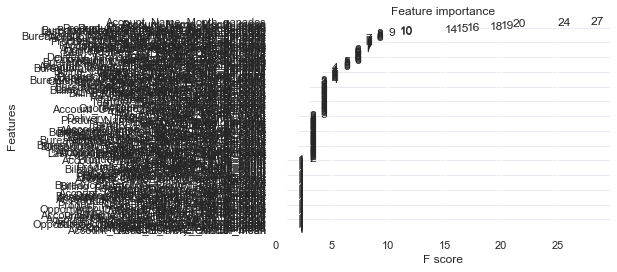

In [76]:
plot = xgb.plot_importance(xg_reg)
mplt.gcf().subplots_adjust(bottom=0.15)
fig = plot.get_figure()
fig.savefig("XgboostFI.png")

In [161]:
#Rf Clasifier
classifier = RandomForestClassifier(n_estimators = 100 ,max_depth=2, random_state=0)
classifier.fit(x_train,y_train)
Y_pred = classifier.predict(x_test)
print(classifier.score(x_test,y_test))
print(classifier.score(x_train,y_train))
print(log_loss(y_test,Y_pred))


0.7003079838900734
0.7047626569781218
10.35117473554394


In [78]:
##CELDAS PARA SUMITEAR ----------------------------------------------------------------


In [79]:
dataset = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv', parse_dates = ['Account_Created_Date', 'Opportunity_Created_Date',
                                                           'Planned_Delivery_Start_Date', 'Planned_Delivery_End_Date',
                                                           'Quote_Expiry_Date', 'Last_Modified_Date','Last_Activity' ])
# Limpio registros con muchos datos faltantes o inutiles
dataset = dataset.drop(columns= ['Prod_Category_A','Product_Category_B','Actual_Delivery_Date','Submitted_for_Approval','Last_Activity','Price','Currency','Brand','Size','Product_Type'])
dataset.dtypes

ID                                             int64
Region                                        object
Territory                                     object
Pricing, Delivery_Terms_Quote_Appr             int64
Pricing, Delivery_Terms_Approved               int64
Bureaucratic_Code_0_Approval                   int64
Bureaucratic_Code_0_Approved                   int64
Bureaucratic_Code                             object
Account_Created_Date                  datetime64[ns]
Source                                        object
Billing_Country                               object
Account_Name                                  object
Opportunity_Name                              object
Opportunity_ID                                 int64
Sales_Contract_No                             object
Account_Owner                                 object
Opportunity_Owner                             object
Account_Type                                  object
Opportunity_Type                              

In [80]:
#limpio los datos no finalzizados
dataset = dataset.loc[(dataset['Stage']== 'Closed Won') | (dataset['Stage']== 'Closed Lost')]
dataset['Stage'].value_counts()

Closed Won     9533
Closed Lost    7350
Name: Stage, dtype: int64

# Convertir mondeas

In [81]:
dataset['conversion'] = dataset['ASP_(converted)']/dataset['ASP']

cotizacion = dataset.groupby(['ASP_Currency', 'Opportunity_Created_Date']).agg({'conversion': 'mean'}).reset_index()
#print(dataset[dataset['Stage']== 'Closed Won']['conversion'].value_counts())
cotizacion = cotizacion.rename(columns = {'conversion': 'conversion_diaria'})
cotizacion

dataset= dataset.merge(cotizacion, on = ['ASP_Currency', 'Opportunity_Created_Date'], how = 'left')

dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,conversion,conversion_diaria
0,27761,EMEA,None,1,1,1,1,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12598,0,None,Person_Name_51,Person_Name_18,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-30,2016-06-13,Person_Name_18,Product_Family_77,Product_Name_99,EUR,0.5200,USD,0.58817,2016-05-01,2016-06-30,2016 - 5,Q2,2016,10,EUR,5272800.00,EUR,5272800.0,Closed Lost,1.131096,1.131095
1,27760,EMEA,None,0,0,0,0,Bureaucratic_Code_4,2015-06-16,None,Netherlands,Account_Name_619,Opportunity_Name_12600,1,39,Person_Name_51,Person_Name_20,Account_Type_2,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-07,2016-01-20,2016-01-15,Person_Name_20,Product_Family_77,Product_Name_100,EUR,0.5300,USD,0.59948,2016-01-18,2016-01-20,2016 - 1,Q1,2016,0,EUR,48230.00,EUR,48230.0,Closed Won,1.131094,1.131095
2,27446,Americas,NW America,0,0,0,0,Bureaucratic_Code_4,2015-04-21,Source_7,United States,Account_Name_1794,Opportunity_Name_469,2,760,Person_Name_64,Person_Name_8,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_4,2015-12-08,2016-09-30,2016-09-29,Person_Name_8,Product_Family_81,Product_Name_91,USD,0.4800,USD,0.48000,2016-01-25,2016-01-25,2016 - 1,Q1,2016,0,USD,83865.60,USD,83865.6,Closed Won,1.000000,1.000000
3,16808,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_415,3,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,NaT,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-03-31,2018 - 2,Q1,2018,14,USD,7421881.50,USD,7421881.5,Closed Lost,1.000000,1.000000
4,16805,Americas,NW America,1,0,1,0,Bureaucratic_Code_5,2013-07-27,Source_11,United States,Account_Name_1201,Opportunity_Name_851,4,None,Person_Name_8,Person_Name_8,Account_Type_5,Opportunity_Type_19,Non Binding,Delivery_Terms_1,2015-12-08,2017-06-02,2018-03-27,Person_Name_8,Product_Family_209,Product_Name_432,USD,0.5300,USD,0.53000,2018-02-01,2018-02-28,2018 - 2,Q1,2018,25,USD,13357192.50,USD,13357192.5,Closed Lost,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16878,8781,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-03-21,2016-03-25,2016 - 3,Q1,2016,0,EUR,103350.00,EUR,299715.0,Closed Won,1.131096,1.131093
16879,8786,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_9245,12801,44,Person_Name_13,Person_Name_13,Account_Type_5,Opportunity_Type_1,Non Binding,Delivery_Terms_2,2015-12-04,NaT,2016-01-19,Person_Name_13,Product_Family_85,Product_Name_111,EUR,0.5200,USD,0.58817,2016-04-04,2016-04-08,2016 - 4,Q2,2016,0,EUR,93015.00,EUR,299715.0,Closed Won,1.131096,1.131093
16880,8792,EMEA,Austria,1,1,1,1,Bureaucratic_Code_4,2016-01-15,Source_7,Austria,Account_Name_726,Opportunity_Name_92

In [82]:
dataset['conversion'] = dataset.loc[:,'conversion'].fillna(dataset['conversion_diaria'])

In [83]:
dataset = dataset.drop(dataset[dataset['conversion'] == np.inf].index)

In [84]:
dataset.loc[dataset['ASP_Currency'] == 'USD', 'conversion'] = 1
dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'JPY' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'JPY', 'conversion'].mean())
dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion']= dataset.loc[dataset.ASP_Currency == 'EUR' , 'conversion'].fillna( dataset.loc[dataset.ASP_Currency == 'EUR', 'conversion'].mean())
dataset['Total_Amount_converted'] = dataset['Total_Amount'] * dataset['conversion']

In [85]:
dataset['delta_planed'] = dataset['Planned_Delivery_End_Date'] - dataset['Planned_Delivery_Start_Date']

In [86]:
dataset.dtypes

ID                                              int64
Region                                         object
Territory                                      object
Pricing, Delivery_Terms_Quote_Appr              int64
Pricing, Delivery_Terms_Approved                int64
Bureaucratic_Code_0_Approval                    int64
Bureaucratic_Code_0_Approved                    int64
Bureaucratic_Code                              object
Account_Created_Date                   datetime64[ns]
Source                                         object
Billing_Country                                object
Account_Name                                   object
Opportunity_Name                               object
Opportunity_ID                                  int64
Sales_Contract_No                              object
Account_Owner                                  object
Opportunity_Owner                              object
Account_Type                                   object
Opportunity_Type            

In [87]:
dataset['acount_age'] = dataset['Opportunity_Created_Date'] - dataset['Account_Created_Date']

# features por oportunity ID

In [88]:
#Opportunity_ID
features= ['sum','mean','median','std', 'max', 'min']

dataset_numerico = dataset[['Opportunity_ID','ASP', 'ASP_(converted)', 'TRF', 'Total_Amount', 'Total_Taxable_Amount', 'Total_Amount_converted']]
#ASP                                           float64
#ASP_(converted)                               float64
#TRF                                             int64
#Total_Amount                                  float64
#Total_Taxable_Amount                          float64
#Total_Amount_converted                        float64

features_num= dataset_numerico.groupby('Opportunity_ID').agg(features)
level_0 = features_num.columns.get_level_values(0)
level_1 = features_num.columns.get_level_values(1)
features_num.columns = level_0 + '_' + level_1
features_num.reset_index()
dataset = dataset.join(features_num, on= 'Opportunity_ID', how = 'left')

In [89]:
dataset.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
                                       ...   
Total_Amount_converted_mean           float64
Total_Amount_converted_median         float64
Total_Amount_converted_std            float64
Total_Amount_converted_max            float64
Total_Amount_converted_min            float64
Length: 83, dtype: object

# Gererador de features cumulative para categoricas

In [90]:
dataset['ganado']= (dataset['Stage']== 'Closed Won' )
dataset['counter']= 1
categorical = ['Region', 'Territory', 'Product_Name', 'Account_Owner','Bureaucratic_Code','Billing_Country', 'Account_Name', 'Opportunity_Owner','Quote_Type', 'Delivery_Terms','Last_Modified_By', 'Product_Family', 'Month', 'Delivery_Quarter']
for agrupador in categorical:
    gruped_product = dataset.groupby(agrupador)[['ganado','counter']].cumsum()
    gruped_product[agrupador + '_mean'] = gruped_product['ganado']/ gruped_product['counter']
    gruped_product= gruped_product.rename(columns = {'ganado':(agrupador + '_ganados'), 'counter': (agrupador + '_count') })
    dataset= dataset.join(gruped_product)

    

In [91]:
dataset.dtypes

ID                                      int64
Region                                 object
Territory                              object
Pricing, Delivery_Terms_Quote_Appr      int64
Pricing, Delivery_Terms_Approved        int64
                                       ...   
Month_count                             int64
Month_mean                            float64
Delivery_Quarter_ganados              float64
Delivery_Quarter_count                  int64
Delivery_Quarter_mean                 float64
Length: 127, dtype: object

# categorical de a pares

In [92]:
for i in range(len(categorical) -1):
    for j in range(i +1, len(categorical)):
        gruped_product = dataset.groupby([categorical[i],categorical[j]])[['ganado','counter']].cumsum()
        gruped_product[categorical[i] + '_'+ categorical[j] + '_mean'] = gruped_product['ganado']/ gruped_product['counter']
        gruped_product= gruped_product.rename(columns = {'ganado':(categorical[i] + '_'+ categorical[j] + '_ganados'), 'counter': (categorical[i] + '_'+ categorical[j] + '_count') })
        dataset= dataset.join(gruped_product)
        

In [93]:
dataset.dtypes

ID                                         int64
Region                                    object
Territory                                 object
Pricing, Delivery_Terms_Quote_Appr         int64
Pricing, Delivery_Terms_Approved           int64
                                          ...   
Product_Family_Delivery_Quarter_count      int64
Product_Family_Delivery_Quarter_mean     float64
Month_Delivery_Quarter_ganados           float64
Month_Delivery_Quarter_count               int64
Month_Delivery_Quarter_mean              float64
Length: 400, dtype: object

In [94]:
dataset

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Bureaucratic_Code,Account_Created_Date,Source,Billing_Country,Account_Name,Opportunity_Name,Opportunity_ID,Sales_Contract_No,Account_Owner,Opportunity_Owner,Account_Type,Opportunity_Type,Quote_Type,Delivery_Terms,Opportunity_Created_Date,Quote_Expiry_Date,Last_Modified_Date,Last_Modified_By,Product_Family,Product_Name,ASP_Currency,ASP,ASP_(converted)_Currency,ASP_(converted),Planned_Delivery_Start_Date,Planned_Delivery_End_Date,Month,Delivery_Quarter,Delivery_Year,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,conversion,conversion_diaria,Total_Amount_converted,delta_planed,acount_age,ASP_sum,ASP_mean,ASP_median,ASP_std,ASP_max,ASP_min,ASP_(converted)_sum,ASP_(converted)_mean,ASP_(converted)_median,ASP_(converted)_std,ASP_(converted)_max,ASP_(converted)_min,TRF_sum,TRF_mean,TRF_median,TRF_std,TRF_max,TRF_min,Total_Amount_sum,Total_Amount_mean,Total_Amount_median,Total_Amount_std,Total_Amount_max,Total_Amount_min,Total_Taxable_Amount_sum,Total_Taxable_Amount_mean,Total_Taxable_Amount_median,Total_Taxable_Amount_std,Total_Taxable_Amount_max,Total_Taxable_Amount_min,Total_Amount_converted_sum,Total_Amount_converted_mean,Total_Amount_converted_median,Total_Amount_converted_std,Total_Amount_converted_max,Total_Amount_converted_min,ganado,counter,Region_ganados,Region_count,Region_mean,Territory_ganados,Territory_count,Territory_mean,Product_Name_ganados,Product_Name_count,Product_Name_mean,Account_Owner_ganados,Account_Owner_count,Account_Owner_mean,Bureaucratic_Code_ganados,Bureaucratic_Code_count,Bureaucratic_Code_mean,Billing_Country_ganados,Billing_Country_count,Billing_Country_mean,Account_Name_ganados,Account_Name_count,Account_Name_mean,Opportunity_Owner_ganados,Opportunity_Owner_count,Opportunity_Owner_mean,Quote_Type_ganados,Quote_Type_count,Quote_Type_mean,Delivery_Terms_ganados,Delivery_Terms_count,Delivery_Terms_mean,Last_Modified_By_ganados,Last_Modified_By_count,Last_Modified_By_mean,Product_Family_ganados,Product_Family_count,Product_Family_mean,Month_ganados,Month_count,Month_mean,Delivery_Quarter_ganados,Delivery_Quarter_count,Delivery_Quarter_mean,Region_Territory_ganados,Region_Territory_count,Region_Territory_mean,Region_Product_Name_ganados,Region_Product_Name_count,Region_Product_Name_mean,Region_Account_Owner_ganados,Region_Account_Owner_count,Region_Account_Owner_mean,Region_Bureaucratic_Code_ganados,Region_Bureaucratic_Code_count,Region_Bureaucratic_Code_mean,Region_Billing_Country_ganados,Region_Billing_Country_count,Region_Billing_Country_mean,Region_Account_Name_ganados,Region_Account_Name_count,Region_Account_Name_mean,Region_Opportunity_Owner_ganados,Region_Opportunity_Owner_count,Region_Opportunity_Owner_mean,Region_Quote_Type_ganados,Region_Quote_Type_count,Region_Quote_Type_mean,Region_Delivery_Terms_ganados,Region_Delivery_Terms_count,Region_Delivery_Terms_mean,Region_Last_Modified_By_ganados,Region_Last_Modified_By_count,Region_Last_Modified_By_mean,Region_Product_Family_ganados,Region_Product_Family_count,Region_Product_Family_mean,Region_Month_ganados,Region_Month_count,Region_Month_mean,Region_Delivery_Quarter_ganados,Region_Delivery_Quarter_count,Region_Delivery_Quarter_mean,Territory_Product_Name_ganados,Territory_Product_Name_count,Territory_Product_Name_mean,Territory_Account_Owner_ganados,Territory_Account_Owner_count,Territory_Account_Owner_mean,Territory_Bureaucratic_Code_ganados,Territory_Bureaucratic_Code_count,Territory_Bureaucratic_Code_mean,Territory_Billing_Country_ganados,Territory_Billing_Country_count,Territory_Billing_Country_mean,Territory_Account_Name_ganados,Territory_Account_Name_count,Territory_Account_Name_mean,Territory_Opportunity_Owner_ganados,Territory_Opportunity_Owner_count,Territory_Opportunity_Owner_mean,Territory_Quote_Type_ganados,Territory_Quote_Type_count,Territor

In [95]:
dataset['Stage']

0        Closed Lost
1         Closed Won
2         Closed Won
3        Closed Lost
4        Closed Lost
            ...     
16878     Closed Won
16879     Closed Won
16880     Closed Won
16881    Closed Lost
16882    Closed Lost
Name: Stage, Length: 16882, dtype: object

In [96]:
#Fin Lucas

In [97]:
#Split

dataset["Stage"] = dataset['Stage'].replace("Closed Won",1)
dataset["Stage"] = dataset['Stage'].replace("Closed Lost",0)
dataset = dataset.drop(dataset[dataset.Stage == "Proposal"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Negotiation"].index)
dataset = dataset.drop(dataset[dataset.Stage == "Qualification"].index)


df_train =  dataset.drop(columns=["Source ","ID","Region","Territory","Bureaucratic_Code","Account_Created_Date","Billing_Country","Account_Name","Opportunity_Name","Opportunity_ID","Sales_Contract_No","Account_Owner","Opportunity_Owner","Account_Type","Opportunity_Type","Quote_Type","Delivery_Terms","Opportunity_Created_Date","Quote_Expiry_Date","Last_Modified_Date","Last_Modified_By","Product_Family","Product_Name","ASP_Currency","ASP","ASP_(converted)_Currency","ASP_(converted)","Planned_Delivery_Start_Date","Planned_Delivery_End_Date","Month","Delivery_Quarter","Delivery_Year","Total_Amount_Currency","Total_Amount","Total_Taxable_Amount_Currency","Total_Taxable_Amount","conversion","conversion_diaria"])

df_train = df_train.drop(columns=["delta_planed","acount_age","ganado"])

df_train = df_train.fillna(-1)

#Features de poca importancia para probar
df_train = df_train.drop(columns=["Bureaucratic_Code_0_Approved"])

Y_train = np.array(df_train['Stage']).astype(int) # prediction 
df_train = df_train.drop(columns=['Stage'])

X_train = df_train.astype(int) #Train local

#Con mayuscula = para sumitear


C:\Users\Bangho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [98]:
#PRONADO FEATURES FIXEADAS TRAIN....................................

In [99]:
trainCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Entrenamieto_ECI_2020.csv',usecols=['ID',"Opportunity_ID"])
feturesTrainCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Features_Train_Lucas.csv')
trainCSV = trainCSV.merge(feturesTrainCSV, right_on="ID",left_on= "ID")
pd.set_option('display.max_columns', None)
trainCSV

,ID,Opportunity_ID,Unnamed: 0,Stage,Region_ganados,Region_count,Region_mean,Territory_ganados,Territory_count,Territory_mean,Product_Name_ganados,Product_Name_count,Product_Name_mean,Account_Owner_ganados,Account_Owner_count,Account_Owner_mean,Bureaucratic_Code_ganados,Bureaucratic_Code_count,Bureaucratic_Code_mean,Billing_Country_ganados,Billing_Country_count,Billing_Country_mean,Account_Name_ganados,Account_Name_count,Account_Name_mean,Opportunity_Owner_ganados,Opportunity_Owner_count,Opportunity_Owner_mean,Quote_Type_ganados,Quote_Type_count,Quote_Type_mean,Delivery_Terms_ganados,Delivery_Terms_count,Delivery_Terms_mean,Product_Family_ganados,Product_Family_count,Product_Family_mean,Month_ganados,Month_count,Month_mean,Delivery_Quarter_ganados,Delivery_Quarter_count,Delivery_Quarter_mean,Region_Territory_ganados,Region_Territory_count,Region_Territory_mean,Region_Product_Name_ganados,Region_Product_Name_count,Region_Product_Name_mean,Region_Account_Owner_ganados,Region_Account_Owner_count,Region_Account_Owner_mean,Region_Bureaucratic_Code_ganados,Region_Bureaucratic_Code_count,Region_Bureaucratic_Code_mean,Region_Billing_Country_ganados,Region_Billing_Country_count,Region_Billing_Country_mean,Region_Account_Name_ganados,Region_Account_Name_count,Region_Account_Name_mean,Region_Opportunity_Owner_ganados,Region_Opportunity_Owner_count,Region_Opportunity_Owner_mean,Region_Quote_Type_ganados,Region_Quote_Type_count,Region_Quote_Type_mean,Region_Delivery_Terms_ganados,Region_Delivery_Terms_count,Region_Delivery_Terms_mean,Region_Product_Family_ganados,Region_Product_Family_count,Region_Product_Family_mean,Region_Month_ganados,Region_Month_count,Region_Month_mean,Region_Delivery_Quarter_ganados,Region_Delivery_Quarter_count,Region_Delivery_Quarter_mean,Territory_Product_Name_ganados,Territory_Product_Name_count,Territory_Product_Name_mean,Territory_Account_Owner_ganados,Territory_Account_Owner_count,Territory_Account_Owner_mean,Territory_Bureaucratic_Code_ganados,Territory_Bureaucratic_Code_count,Territory_Bureaucratic_Code_mean,Territory_Billing_Country_ganados,Territory_Billing_Country_count,Territory_Billing_Country_mean,Territory_Account_Name_ganados,Territory_Account_Name_count,Territory_Account_Name_mean,Territory_Opportunity_Owner_ganados,Territory_Opportunity_Owner_count,Territory_Opportunity_Owner_mean,Territory_Quote_Type_ganados,Territory_Quote_Type_count,Territory_Quote_Type_mean,Territory_Delivery_Terms_ganados,Territory_Delivery_Terms_count,Territory_Delivery_Terms_mean,Territory_Product_Family_ganados,Territory_Product_Family_count,Territory_Product_Family_mean,Territory_Month_ganados,Territory_Month_count,Territory_Month_mean,Territory_Delivery_Quarter_ganados,Territory_Delivery_Quarter_count,Territory_Delivery_Quarter_mean,Product_Name_Account_Owner_ganados,Product_Name_Account_Owner_count,Product_Name_Account_Owner_mean,Product_Name_Bureaucratic_Code_ganados,Product_Name_Bureaucratic_Code_count,Product_Name_Bureaucratic_Code_mean,Product_Name_Billing_Country_ganados,Product_Name_Billing_Country_count,Product_Name_Billing_Country_mean,Product_Name_Account_Name_ganados,Product_Name_Account_Name_count,Product_Name_Account_Name_mean,Product_Name_Opportunity_Owner_ganados,Product_Name_Opportunity_Owner_count,Product_Name_Opportunity_Owner_mean,Product_Name_Quote_Type_ganados,Product_Name_Quote_Type_count,Product_Name_Quote_Type_mean,Product_Name_Delivery_Terms_ganados,Product_Name_Delivery_Terms_count,Product_Name_Delivery_Terms_mean,Product_Name_Product_Family_ganados,Product_Name_Product_Family_count,Product_Name_Product_Family_mean,Product_Name_Month_ganados,Product_Name_Month_count,Product_Name_Month_mean,Product_Name_Delivery_Quarter_ganados,Product_Name_Delivery_Quarter_count,Product_Name_Delivery_Quarter_mean,Account_Owner_Bureaucratic_Code_ganados,Account_Owner_Bureaucratic_Code_count,Account_Owner_Bureaucratic_Code_mean,Account_Owner_Billing_Country_ganados,Account_Owner_Billing_Country_count,Account_Owner_B

In [100]:
#Split

trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Won",1)
trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Lost",0)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Proposal"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Negotiation"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Qualification"].index)


df_train =  trainCSV.drop(columns=["delta_planed","acount_age","ID"])

df_train = df_train.fillna(-1)



Y = np.array(df_train['Stage']).astype(int) # prediction 
df_train = df_train.drop(columns=['Stage'])

X = df_train.astype(float) #Train local
# X = df_train #Train local


x_train, x_test, y_train, y_test = train_test_split(X,Y)

C:\Users\Bangho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [101]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)
print(xg_reg.score(x_test,y_test))
print(xg_reg.score(x_train,y_train))

0.9886282871357498
0.9945501935076219


In [102]:
#PROBANDO FEATURES FIXEADAS EN TEST

In [103]:
testCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Test_ECI_2020.csv',usecols=['ID',"Opportunity_ID"])
feturesTestCSV = pd.read_csv('C:/Users/Bangho/Desktop/Datos/Tp1PandasRec/Features_Test_Lucas.csv')
testCSV = testCSV.merge(feturesTestCSV, right_on="ID",left_on= "ID")
testCSV

,ID,Opportunity_ID,Unnamed: 0,Stage,Region_ganados,Region_count,Region_mean,Territory_ganados,Territory_count,Territory_mean,Product_Name_ganados,Product_Name_count,Product_Name_mean,Account_Owner_ganados,Account_Owner_count,Account_Owner_mean,Bureaucratic_Code_ganados,Bureaucratic_Code_count,Bureaucratic_Code_mean,Billing_Country_ganados,Billing_Country_count,Billing_Country_mean,Account_Name_ganados,Account_Name_count,Account_Name_mean,Opportunity_Owner_ganados,Opportunity_Owner_count,Opportunity_Owner_mean,Quote_Type_ganados,Quote_Type_count,Quote_Type_mean,Delivery_Terms_ganados,Delivery_Terms_count,Delivery_Terms_mean,Product_Family_ganados,Product_Family_count,Product_Family_mean,Month_ganados,Month_count,Month_mean,Delivery_Quarter_ganados,Delivery_Quarter_count,Delivery_Quarter_mean,Region_Territory_ganados,Region_Territory_count,Region_Territory_mean,Region_Product_Name_ganados,Region_Product_Name_count,Region_Product_Name_mean,Region_Account_Owner_ganados,Region_Account_Owner_count,Region_Account_Owner_mean,Region_Bureaucratic_Code_ganados,Region_Bureaucratic_Code_count,Region_Bureaucratic_Code_mean,Region_Billing_Country_ganados,Region_Billing_Country_count,Region_Billing_Country_mean,Region_Account_Name_ganados,Region_Account_Name_count,Region_Account_Name_mean,Region_Opportunity_Owner_ganados,Region_Opportunity_Owner_count,Region_Opportunity_Owner_mean,Region_Quote_Type_ganados,Region_Quote_Type_count,Region_Quote_Type_mean,Region_Delivery_Terms_ganados,Region_Delivery_Terms_count,Region_Delivery_Terms_mean,Region_Product_Family_ganados,Region_Product_Family_count,Region_Product_Family_mean,Region_Month_ganados,Region_Month_count,Region_Month_mean,Region_Delivery_Quarter_ganados,Region_Delivery_Quarter_count,Region_Delivery_Quarter_mean,Territory_Product_Name_ganados,Territory_Product_Name_count,Territory_Product_Name_mean,Territory_Account_Owner_ganados,Territory_Account_Owner_count,Territory_Account_Owner_mean,Territory_Bureaucratic_Code_ganados,Territory_Bureaucratic_Code_count,Territory_Bureaucratic_Code_mean,Territory_Billing_Country_ganados,Territory_Billing_Country_count,Territory_Billing_Country_mean,Territory_Account_Name_ganados,Territory_Account_Name_count,Territory_Account_Name_mean,Territory_Opportunity_Owner_ganados,Territory_Opportunity_Owner_count,Territory_Opportunity_Owner_mean,Territory_Quote_Type_ganados,Territory_Quote_Type_count,Territory_Quote_Type_mean,Territory_Delivery_Terms_ganados,Territory_Delivery_Terms_count,Territory_Delivery_Terms_mean,Territory_Product_Family_ganados,Territory_Product_Family_count,Territory_Product_Family_mean,Territory_Month_ganados,Territory_Month_count,Territory_Month_mean,Territory_Delivery_Quarter_ganados,Territory_Delivery_Quarter_count,Territory_Delivery_Quarter_mean,Product_Name_Account_Owner_ganados,Product_Name_Account_Owner_count,Product_Name_Account_Owner_mean,Product_Name_Bureaucratic_Code_ganados,Product_Name_Bureaucratic_Code_count,Product_Name_Bureaucratic_Code_mean,Product_Name_Billing_Country_ganados,Product_Name_Billing_Country_count,Product_Name_Billing_Country_mean,Product_Name_Account_Name_ganados,Product_Name_Account_Name_count,Product_Name_Account_Name_mean,Product_Name_Opportunity_Owner_ganados,Product_Name_Opportunity_Owner_count,Product_Name_Opportunity_Owner_mean,Product_Name_Quote_Type_ganados,Product_Name_Quote_Type_count,Product_Name_Quote_Type_mean,Product_Name_Delivery_Terms_ganados,Product_Name_Delivery_Terms_count,Product_Name_Delivery_Terms_mean,Product_Name_Product_Family_ganados,Product_Name_Product_Family_count,Product_Name_Product_Family_mean,Product_Name_Month_ganados,Product_Name_Month_count,Product_Name_Month_mean,Product_Name_Delivery_Quarter_ganados,Product_Name_Delivery_Quarter_count,Product_Name_Delivery_Quarter_mean,Account_Owner_Bureaucratic_Code_ganados,Account_Owner_Bureaucratic_Code_count,Account_Owner_Bureaucratic_Code_mean,Account_Owner_Billing_Country_ganados,Account_Owner_Billing_Country_count,Account_Owner_B

In [104]:

trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Won",1)
trainCSV["Stage"] = trainCSV['Stage'].replace("Closed Lost",0)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Proposal"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Negotiation"].index)
trainCSV = trainCSV.drop(trainCSV[trainCSV.Stage == "Qualification"].index)


df_train =  trainCSV.drop(columns=["delta_planed","acount_age","ID"])
# TIene stage el test por alguna razon, pero son todos nans asi qeu tecnicamente esta bien
df_test =  testCSV.drop(columns=["delta_planed","acount_age","Stage","ID"])

df_train = df_train.fillna(-1)



y_train = np.array(df_train['Stage']).astype(int) # prediction 
df_train = df_train.drop(columns=['Stage'])

x_train = df_train.astype(float) #Train local

x_test = df_test.astype(float)

C:\Users\Bangho\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [105]:
xg_reg = xgb.XGBClassifier(objective ='binary:logistic', colsample_bytree = 0.3, learning_rate = 0.2, max_depth = 5, alpha = 10, n_estimators = 150)
xg_reg.fit(x_train,y_train)
Y_pred = xg_reg.predict(x_test)

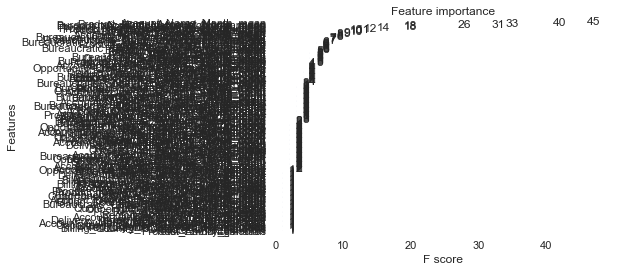

In [106]:
plot = xgb.plot_importance(xg_reg)
mplt.gcf().subplots_adjust(bottom=0.15)
fig = plot.get_figure()

In [107]:
df =pd.DataFrame()
df["Opportunity_ID"]= x_test["Opportunity_ID"]
df["Target"]= Y_pred
df.to_csv("Prediccion.csv",index= False)